In [ ]:
!pip install ultralytics

In [2]:
import os, sys
import pandas as pd
from dotenv import load_dotenv
rpath = os.path.abspath('/home/user/Documents/10/w12/Semantic Image and Text Alignment')

if rpath not in sys.path:
    sys.path.insert(0, rpath)
load_dotenv()
rpath

'/home/user/Documents/10/w12/Semantic Image and Text Alignment'

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [4]:
# Load a model
model = YOLO("yolov8n.pt")  # load pre trained model

[W NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


0: 544x640 10 persons, 3 ties, 1 chair, 414.0ms
Speed: 7.6ms preprocess, 414.0ms inference, 4.1ms postprocess per image at shape (1, 3, 544, 640)


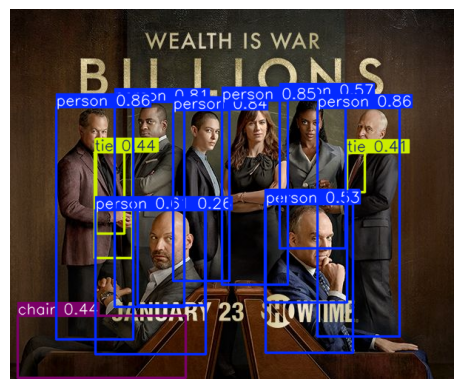

True

In [5]:
# Load the image
image_path = rpath + "/data/Assets/performance_data/endframe.jpg"
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Draw bounding boxes and labels on the image
annotated_image = results[0].plot()  # results[0] contains the results for the first image

# Display the image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Save the image with annotations
output_path =  rpath + '/data/Assets/result.jpg'
cv2.imwrite(output_path, annotated_image)


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the main image and the template image
main_image_path =  rpath + "/data/Assets/adv/endframe.png"
template_image_path = rpath + "/data/Assets/adv/engagement_animation.png"

main_image = cv2.imread(main_image_path, cv2.IMREAD_COLOR)
template_image = cv2.imread(template_image_path, cv2.IMREAD_COLOR)

# Convert images to grayscale
main_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

# Get the dimensions of the template image
w, h = template_gray.shape[::-1]

# Perform template matching
res = cv2.matchTemplate(main_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# Print the result matrix for debugging
print("Result matrix:", res)

# Set a threshold for detection
threshold = 0.8
loc = np.where(res >= threshold)

# Print the locations for debugging
print("Locations:", loc)

# Check if any locations are found
if len(loc[0]) == 0:
    print("No match found. Try lowering the threshold.")
else:
    # Draw bounding boxes around the detected regions
    for pt in zip(*loc[::-1]):
        cv2.rectangle(main_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

    # Display the result
    plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Save the result
output_path =  rpath + '/data/Assets/result.jpg'
cv2.imwrite(output_path, main_image)


Result matrix: [[  0.0071637  -0.0017529  -0.0098369 ...           0           0           0]
 [  0.0078353 -0.00092631  -0.0097741 ...           0           0           0]
 [  0.0072732  -0.0034559   -0.012289 ...           0           0           0]
 ...
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]]
Locations: (array([], dtype=int64), array([], dtype=int64))
No match found. Try lowering the threshold.


True

In [34]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

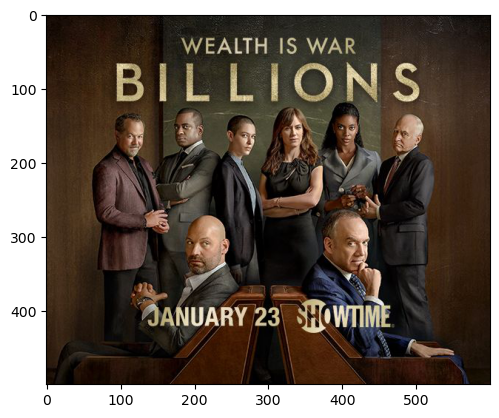

In [36]:
image_path = rpath + "/data/Assets/performance_data/endframe.jpg"
image = plt.imread(image_path)

image.shape
plt.imshow(image)

In [42]:
pic_n = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
pic_n.shape

(300000, 3)

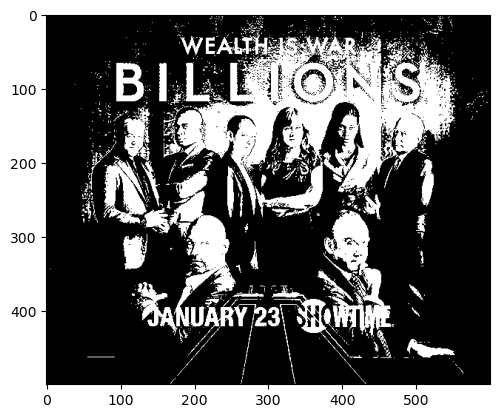

In [46]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

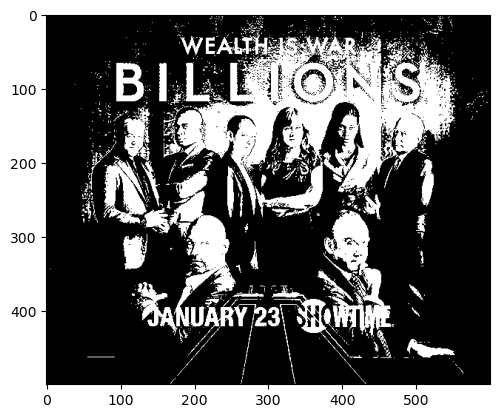

In [48]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [81]:
!pip install extcolors

In [116]:
import extcolors
from PIL import Image
def get_colors(img_path):
    img = Image.open(img_path).convert("RGBA")
    return extcolors.extract_from_image(img, tolerance=33, limit=10)

In [108]:
extcolors_col = get_colors(image_path)
extcolors_col

([((1, 0, 0), 230664),
  ((77, 35, 10), 38552),
  ((195, 177, 129), 17854),
  ((91, 87, 88), 12796),
  ((251, 255, 255), 85),
  ((37, 44, 88), 47),
  ((172, 159, 187), 2)],
 300000)

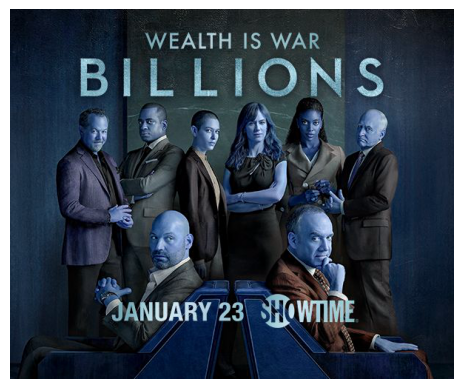

In [112]:
import matplotlib.pyplot as plt
plt.imshow(img_col)
plt.axis('off')  
plt.show()